<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1lOQZpKxbxKw42yts3oQ86X-xkFddWyWW?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
!pip install --upgrade sklearn xgboost lightgbm

In [1]:
#Loading and unzipping dataset 
!wget https://github.com/blaze-fire/hp-ml-challenge/blob/main/data.zip?raw=true
!unzip /content/data.zip?raw=true

--2022-06-04 05:11:52--  https://github.com/blaze-fire/hp-ml-challenge/blob/main/data.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/blaze-fire/hp-ml-challenge/raw/main/data.zip [following]
--2022-06-04 05:11:55--  https://github.com/blaze-fire/hp-ml-challenge/raw/main/data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/blaze-fire/hp-ml-challenge/main/data.zip [following]
--2022-06-04 05:11:55--  https://raw.githubusercontent.com/blaze-fire/hp-ml-challenge/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/data/Phising_Training_Dataset.csv')

In [4]:
df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


 1    5034
-1    3921
Name: Result, dtype: int64 




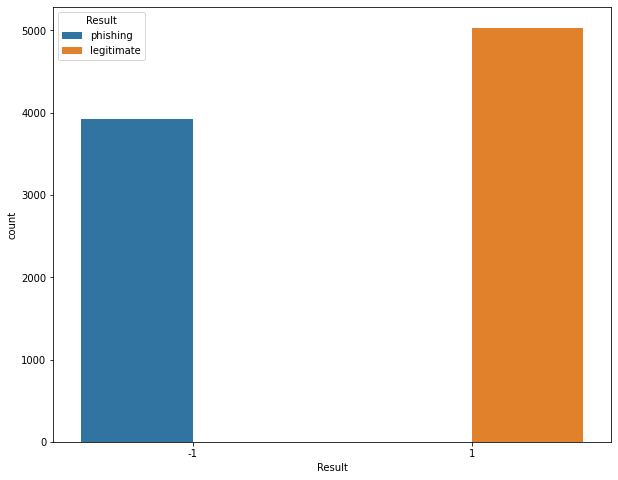

In [5]:
print(f"{df['Result'].value_counts()} \n\n")
plt.figure(figsize = (10, 8))
sns.countplot(x=df['Result'], hue=df['Result'].apply(lambda x: "legitimate" if x == 1 else "phishing"))

In [6]:
for col in df.drop(['key', 'Result'], axis=1).columns:
  print(f"{pd.crosstab(df[col], df['Result'])} \n \n")

Result       -1     1
having_IP            
-1         1557  1545
 1         2364  3489 
 

Result        -1     1
URL_Length            
-1          3273  3994
 0            69    45
 1           579   995 
 

Result                -1     1
Shortining_Service            
-1                   410   752
 1                  3511  4282 
 

Result              -1     1
having_At_Symbol            
-1                 648   653
 1                3273  4381 
 

Result                      -1     1
double_slash_redirecting            
-1                         452   709
 1                        3469  4325 
 

Result           -1     1
Prefix_Suffix            
-1             3921  3849
 1                0  1185 
 

Result               -1     1
having_Sub_Domain            
-1                 1449  1244
 0                 1819  1107
 1                  653  2683 
 

Result            -1     1
SSLfinal_State            
-1              2415   405
 0               928    18
 1               57

From the above cross-tabulation b/w different columns with target column we observe that for one particulat column `Prefix_Suffix`, if the value in the columns is 0 i.e. suspicios the website is always interpreted as phising 

We are going to test this relationship in our test dataset

In [7]:
test_df = pd.read_csv('/content/data/Phising_Testing_Dataset.csv')

In [8]:
preds = np.where(test_df['Prefix_Suffix']==1, 1, -1)

In [9]:
# sub = pd.DataFrame({'key': test_df['key'], 'Result':preds})
# sub.to_csv('sub.csv', index=False)

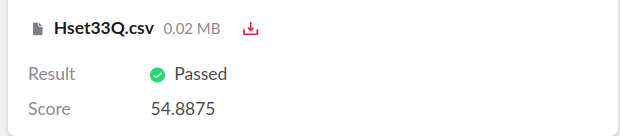

Well the score is better than random generated output but still not good

# EDA

Correlation b/w d/f features

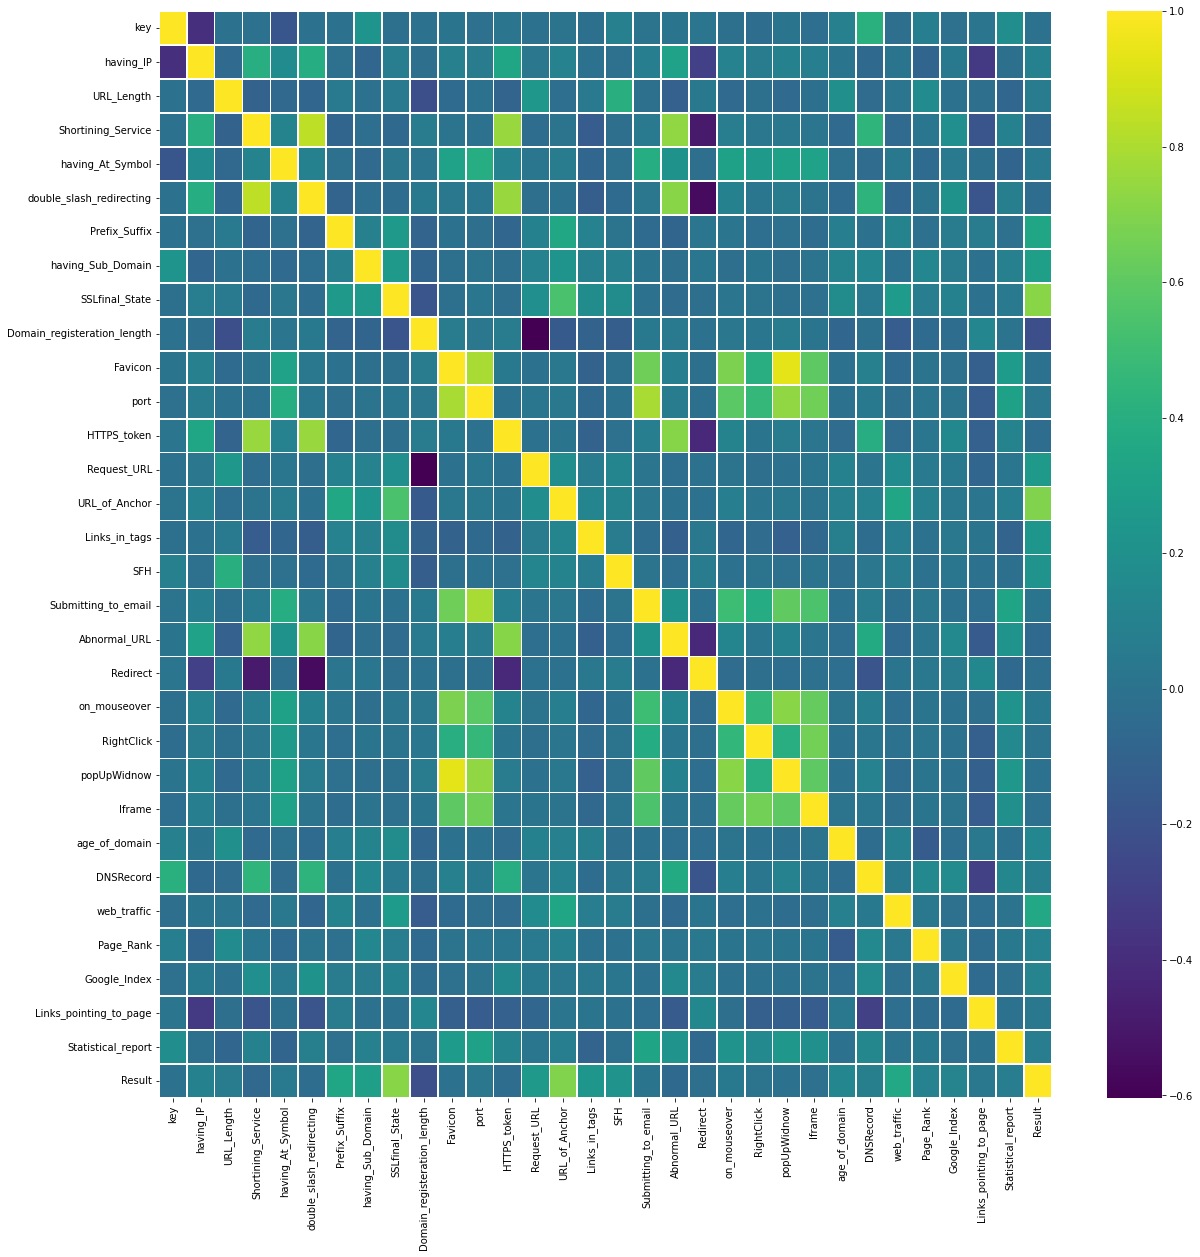

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), linewidths=.7, cmap='viridis')

Correlation of d/f variables with Result column

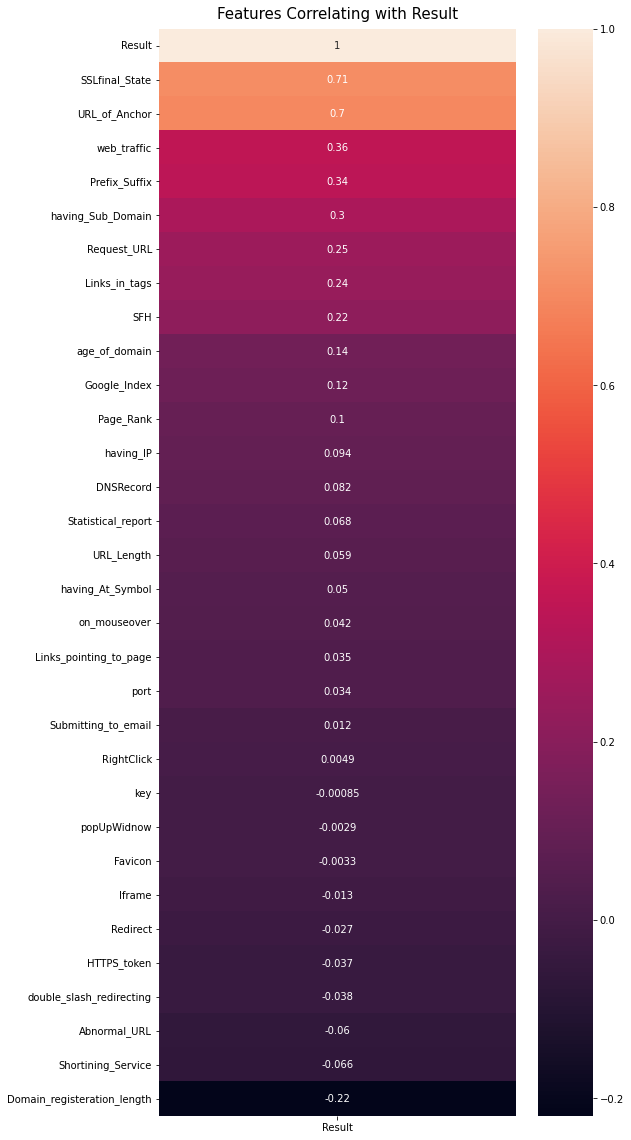

In [11]:
plt.figure(figsize=(8, 20))
hmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), annot=True)
hmap.set_title('Features Correlating with Result', fontdict={'fontsize':15}, pad=10);

# prepare training data

In [12]:
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['key', 'Result'], axis=1), df['Result'], stratify=df['Result'].values)

In [14]:
X = df.drop(['key', 'Result'], axis=1)
y = df.Result

# Load test data

In [15]:
test_df = pd.read_csv('/content/data/Phising_Testing_Dataset.csv')

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(random_state=42)
ridge_clf = RidgeClassifier(random_state=42)
svc = SVC(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
NB = GaussianNB()

In [ ]:
param_logreg = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                'C': [100, 10, 1.0, 0.1, 0.01]}

paramRidgeCLF = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

param_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'C':  [100, 10, 1.0, 0.1, 0.001]
             }

param_dtree = {'criterion': ['gini'], 
               'max_depth': [20], 
               'min_samples_leaf': [5]}

param_knn = {'n_neighbors': np.arange(1, 22),
             'metric':  ['euclidean', 'manhattan', 'minkowski'],
             'weights': ['uniform', 'distance']
             }

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
param_grid = [param_logreg, paramRidgeCLF, param_svm, param_dtree, param_knn, params_NB]

estimators = [logreg, ridge_clf, svc, dtree, knn, NB]

In [ ]:
modelsAndParam = list(zip(estimators, param_grid))

In [ ]:
for (model, params) in modelsAndParam:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=cv, scoring='f1', verbose=0,error_score=0)
  grid_result = grid_search.fit(X, y)


  #open text file
  best_params = open("best_params.txt", "a")

  #write to file
  best_params.write(f'{str(grid_result.best_estimator_)} \t score: {str(grid_result.best_score_)} \n\n')

  #close file
  best_params.close()


  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))
  
  #make submisiion file
  preds = grid_result.best_estimator_.predict(test_df.drop(['key'], axis=1))
  # sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
  # sub.to_csv(f'{type(model).__name__}_sub.csv', index=False)
  
  print("\n\n")

## results

Logistic Regression: submission result

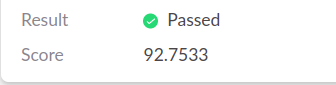

Ridge Classifier: submission result

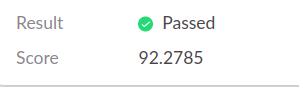

SVM: submission result

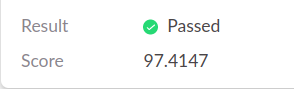

Decesion Tree: submission result

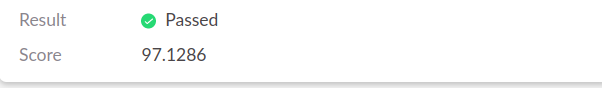

KNN: submission result

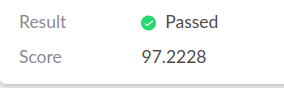

GaussianNB: submission result

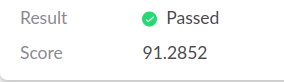

# install rapids

In [ ]:
!pip install dask-ml

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:32
🔁 Restarting kernel...


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.

!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

 

## Gpu-models

## CUML Random Forest

In [ ]:
from cuml.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
import dask_ml.model_selection as dcv

In [ ]:
cuRFC = RandomForestClassifier(random_state=42)

/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:794: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


In [ ]:
paramRFC = {
            'max_features': ['sqrt'], 
            'max_depth': [13],
            'n_estimators':[1200, 1250, 1000],
            'split_criterion': [0],
            'min_samples_leaf': [1]
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dcv.GridSearchCV(cuRFC, paramRFC, scoring='f1', cv=10)

In [ ]:
grid.fit(X.apply(pd.to_numeric, downcast='float'), y)

/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:794: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1],
                         'n_estimators': [1200, 1250, 1000],
                         'split_criterion': [0]},
             scoring='roc_auc')

In [ ]:
grid.best_params_

{'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1250,
 'split_criterion': 0}

In [ ]:
grid.best_score_

0.9670456687342235

result with random-forest

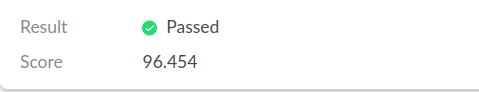

**Note**: Decision Tree slightly performs better than Random Forest 

# LightGBM

In [16]:
from lightgbm import LGBMClassifier 

In [ ]:
lgbm = LGBMClassifier(random_state=42)

In [ ]:
paramLGBM = {
          'boosting_type': ['gbdt'],
          'max_depth': [11],
          'num_leaves': [100],
          'min_data_in_leaf': [50],
          'learning_rate': [0.3],
          'lambda_l1': [0],
          'lambda_l2': [0],
          'n_estimator': [99],
          'subsample_for_bin':[200000],
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lgbm_gridSearch = GridSearchCV(estimator=lgbm, param_grid=paramLGBM, n_jobs=-1, cv=cv, scoring='f1', verbose=0,error_score=0)


In [ ]:
lgbm_gridSearch.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LGBMClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'], 'lambda_l1': [0],
                         'lambda_l2': [0], 'learning_rate': [0.3],
                         'max_depth': [11], 'min_data_in_leaf': [50],
                         'n_estimator': [99], 'num_leaves': [100],
                         'subsample_for_bin': [200000]},
             scoring='f1')

In [ ]:
lgbm_gridSearch.best_params_

{'boosting_type': 'gbdt',
 'lambda_l1': 0,
 'lambda_l2': 0,
 'learning_rate': 0.3,
 'max_depth': 11,
 'min_data_in_leaf': 50,
 'n_estimator': 99,
 'num_leaves': 100,
 'subsample_for_bin': 200000}

In [ ]:
lgbm_gridSearch.best_estimator_

LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.3, max_depth=11,
               min_data_in_leaf=50, n_estimator=99, num_leaves=100,
               random_state=42)

In [ ]:
preds = lgbm_gridSearch.best_estimator_.predict(test_df.drop(['key'], axis=1))
sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
sub.to_csv(f'{type(lgbm_gridSearch.best_estimator_).__name__}_sub.csv', index=False)

result with lightgbm classifier

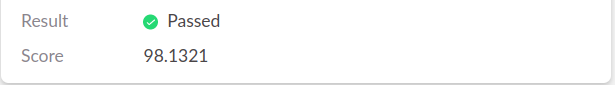

## kfold with lgbm_best model

In [17]:
lgbm_best = LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.3, max_depth=11,
               min_data_in_leaf=50, n_estimator=99, num_leaves=100,
               random_state=42)

In [18]:
df_train = df.drop('key', axis=1)

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=30, random_state=0, shuffle=True)

In [33]:
from sklearn.metrics import f1_score 

In [34]:
sub_preds = []

In [35]:
for train_index, val_index in kf.split(df_train):
  X_train = df_train.drop('Result', axis=1).iloc[train_index]
  y_train = df_train['Result'].iloc[train_index]

  X_val = df_train.drop('Result', axis=1).iloc[val_index]
  y_val = df_train['Result'].iloc[val_index]
  lgbm_best.fit(X_train, y_train)
  pred_val = lgbm_best.predict(X_val) 
  print(f1_score(y_val, pred_val))

  #making test predictions
  preds = lgbm_best.predict(test_df.drop(['key'], axis=1))
  sub_preds.append(preds)


0.9821428571428571
0.9855072463768115
0.9791044776119403
0.9754601226993865
0.9779179810725552
0.9649122807017545
0.9681159420289854
0.9665653495440729
0.978494623655914
0.9742120343839543
0.9811320754716981
0.9832402234636872
0.9813664596273292
0.972809667673716
0.9911504424778761
0.9764705882352942
0.990990990990991
0.9688385269121812
0.9846153846153846
0.9823529411764705
0.9679144385026738
0.9749303621169918
0.9740259740259739
0.967359050445104
0.9906542056074767
0.9780564263322884
0.9587301587301587
0.9492537313432836
0.978494623655914
0.9696969696969697


In [36]:
preds = np.array(sub_preds).mean(axis=0)

In [37]:
sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
sub.to_csv('kfold_sub.csv', index=False)

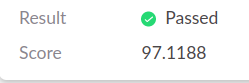

## xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier(random_state=42)

In [ ]:

paramXGB = {'max_depth': [10],
            'subsample': [0.7],
            'colsample_bytree': [0.9, 1],
            'min_child_weight': [0.9, 1, 1.1],
            'lambda': [0.9],
            'alpha': [0.1],
            'tree_method': ['gpu_hist']
            }

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbGrid = GridSearchCV(xgb_clf, paramXGB, scoring='f1', cv=cv)

In [ ]:
xgbGrid.fit(X, y)

In [ ]:
xgbGrid.best_params_

{'alpha': 0.1,
 'colsample_bytree': 1,
 'lambda': 0.9,
 'max_depth': 10,
 'min_child_weight': 1,
 'subsample': 0.7,
 'tree_method': 'gpu_hist'}

In [ ]:
# preds = xgbGrid.best_estimator_.predict(test_df.drop(['key'], axis=1))
# sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
# sub.to_csv(f'{type(xgbGrid).__name__}_sub.csv', index=False)

result with XGBoost Classifier

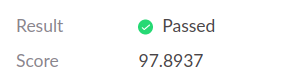

## Catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(task_type="GPU", devices='0:1')

In [ ]:
paramCatboost = {
                 'model_size_reg': np.arange(0, 0.01, 0.001),
                 'max_depth': [6],
                 'iterations':[449],
                 'learning_rate': [0.09],
                 'objective': ['Logloss'],
                 "bootstrap_type": ['Bernoulli'],
                 'max_leaves': [64],
                 "boosting_type": ["Plain"],
                 'leaf_estimation_iterations': [9],
                 'leaf_estimation_method': ['Newton'],
                 'l2_leaf_reg': [3],
                 'random_seed': [0]}

catboostGrid = GridSearchCV(catboost_clf, paramCatboost, cv=10, scoring='f1', verbose=0)

In [ ]:
catboostGrid.fit(X, y)

In [ ]:
catboostGrid.best_params_

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'iterations': 449,
 'l2_leaf_reg': 3,
 'leaf_estimation_iterations': 9,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.09,
 'max_depth': 6,
 'max_leaves': 64,
 'model_size_reg': 0.0,
 'objective': 'Logloss',
 'random_seed': 0}

In [ ]:
catboostGrid.best_score_

0.9727156205041814

In [ ]:
# preds = catboostGrid.best_estimator_.predict(test_df.drop(['key'], axis=1))
# sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
# sub.to_csv(f'{type(catboostGrid.best_estimator_).__name__}_sub.csv', index=False)

result with Catboost Classifier

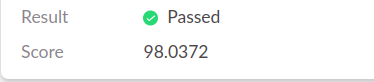

## testing with column Prefix_Suffix
As we observed that for column `Prefix_Suffix`, if the value in the columns is 0 i.e. suspicious the website is always interpreted as phishing. 

We are going to test this relationship in our test dataset.

Here we only predict values where the prediction value is -1

In [ ]:
pred_test = np.where(test_df['Prefix_Suffix']==1, 1, -1)

for i in range(0, len(preds)):
  if pred_test[i] == -1:
    pred_test[i] = preds[i]

sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(pred_test == 0, -1, 1)})
sub.to_csv(f'test_sub.csv', index=False)

# Voting Classifier

In [ ]:
lgbmClf = LGBMClassifier(lambda_l1=0, 
                      lambda_l2=0, 
                      learning_rate=0.3, 
                      max_depth=11,
                      min_data_in_leaf=50, 
                      n_estimator=99, 
                      num_leaves=100,
                      random_state=42)



CatboostClfBest = CatBoostClassifier(boosting_type= 'Plain', 
                                   bootstrap_type = 'Bernoulli', 
                                   iterations = 449, 
                                   l2_leaf_reg = 3, 
                                   leaf_estimation_iterations = 9, 
                                   leaf_estimation_method = 'Newton',
                                   learning_rate = 0.09, 
                                   max_depth = 6, 
                                   max_leaves = 64, 
                                   model_size_reg = 0.0, 
                                   objective = 'Logloss', 
                                   random_seed = 0)


In [ ]:
from sklearn.ensemble import VotingClassifier
votClf = VotingClassifier(estimators=[('lgb', lgbmClf), ('catboost', CatboostClfBest)], voting='soft')
votClf.fit(X, y)

In [ ]:
# preds = votClf.predict(test_df.drop(['key'], axis=1))
# sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
# sub.to_csv(f'{type(votClf).__name__}_sub.csv', index=False)

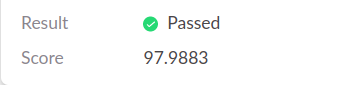

# Extra

## Feature interation

In [ ]:
X_temp = X.copy()

`Making the target variables positive for binary classification tasks, we will change them back while submitting`

In [ ]:
for col in X.columns:
  X_temp[col] = X[col].apply(lambda x: 2 if x == -1 else x)

* `Here we are basically calculating feature interactions b/w our columns` <br>
* `i.e, we add, subtract and multiply each column with every other column` <br>
* `Then we select k best features from it and traina RandomForest on it`

In [ ]:
for col1 in X.columns:
  for col2 in X.columns:
    if(col1 != col2):
      X_temp[f'{col1}_plus_{col2}'] = X_temp[col1] + X_temp[col2]
      X_temp[f'{col1}_diff_{col2}'] = X_temp[col1] - X_temp[col2]
      X_temp[f'{col1}_mul_{col2}'] = X_temp[col1] * X_temp[col2]
    

In [ ]:
X_temp.shape

(8955, 2640)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_temp, y)
X_transformed = sel.transform(X_temp)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)
rfc.fit(X_transformed, y)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
rfc.oob_score_

0.9687325516471245

In [ ]:
#preparing test
test_temp = test_df.drop('key', axis=1).copy()
for col1 in X.columns:
  for col2 in X.columns:
    if(col1 != col2):
      test_temp[f'{col1}_plus_{col2}'] = test_temp[col1] + test_temp[col2]
      test_temp[f'{col1}_diff_{col2}'] = test_temp[col1] - test_temp[col2]
      test_temp[f'{col1}_mul_{col2}'] = test_temp[col1] * test_temp[col2]
    


In [ ]:
test_temp.shape

(2100, 2640)

In [ ]:
test_data = sel.transform(test_temp)

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
# preds = rfc.predict(test_data)
# sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
# sub.to_csv(f'{type(rfc).__name__}_sub.csv', index=False)

Clearly this overfits the dataset and the predictions are poor accordingly

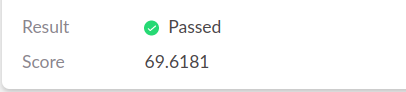

# Deep Learning

In [ ]:
!pip install scikeras[tensorflow]


`Training a keras model and wrapping in KerasClassifier to fine tune using grid search and make predctions`

In [ ]:
import keras
import tensorflow as tf
import keras.backend as K
from scikeras.wrappers import KerasClassifier

In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
params = {
    "hidden_layer_dim": [50, 100, 200],
    'optimizer__learning_rate': [0.001],
    'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    'optimizer': ['Adagrad', 'Adam'],
    'activation': ['softmax', 'relu', 'sigmoid', 'linear']
}

In [ ]:
from keras import callbacks
def get_model():
    # note that meta is a special argument that will be
    # handed a dict containing input metadata

    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape = (30,)))
    model.add(keras.layers.Activation("sigmoid"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("sigmoid"))
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation("sigmoid"))
    model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(
                                                  learning_rate=0.001,
                                                  beta_1=0.91,
                                                  beta_2=0.99,
                                                  epsilon=1e-06,
                                                  amsgrad=False,
                                                  name="Adam",
              ), 
              metrics=[get_f1])
    return model

In [ ]:
model = KerasClassifier(get_model, loss='binary_crossentropy', epochs=30)

In [ ]:
gs = GridSearchCV(model, params, refit=False, cv=5, scoring='f1')

gs.fit(X, y)

Epoch 1/30
224/224 [==============================] - 1s 2ms/step - loss: 0.6542 - get_f1: 0.7337
Epoch 2/30
224/224 [==============================] - 0s 2ms/step - loss: 0.5586 - get_f1: 0.8349
Epoch 3/30
224/224 [==============================] - 0s 2ms/step - loss: 0.4579 - get_f1: 0.8805
Epoch 4/30
224/224 [==============================] - 0s 2ms/step - loss: 0.3752 - get_f1: 0.8942
Epoch 5/30
224/224 [==============================] - 0s 2ms/step - loss: 0.3192 - get_f1: 0.9048
Epoch 6/30
224/224 [==============================] - 0s 2ms/step - loss: 0.2842 - get_f1: 0.9116
Epoch 7/30
224/224 [==============================] - 0s 2ms/step - loss: 0.2631 - get_f1: 0.9141
Epoch 8/30
224/224 [==============================] - 0s 2ms/step - loss: 0.2476 - get_f1: 0.9193
Epoch 9/30
224/224 [==============================] - 0s 2ms/step - loss: 0.2386 - get_f1: 0.9187
Epoch 10/30
224/224 [==============================] - 0s 2ms/step - loss: 0.2324 - get_f1: 0.9226
Epoch 11/30
224/224

GridSearchCV(cv=5,
             estimator=KerasClassifier(epochs=30, loss='binary_crossentropy', model=<function get_model at 0x7f94e04767a0>),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                                       'Adam', 'Adamax', 'Nadam'],
                         'optimizer__learning_rate': [0.001, 0.0001]},
             refit=False, scoring='f1')

In [ ]:
print(gs.best_score_, gs.best_params_)

0.9302971004734983 {'optimizer': 'Adagrad', 'optimizer__learning_rate': 0.001}


In [ ]:
preds = (model.predict(test_df.drop('key', axis=1).values).flatten() > 0.5).astype(np.int8)

In [ ]:
# sub = pd.DataFrame({'key':test_df['key'].values, 'Result':np.where(preds == 0, -1, 1)})
# sub.to_csv(f'keras_sub.csv', index=False)

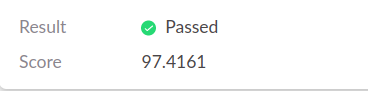